# Data Visualization - Indicators of Heavy Traffic on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway.](https://en.wikipedia.org/wiki/Interstate_94)

Dataset is downloaded from [here.](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

# Data Exploration

We will import Pandas library to work with DataFrames. Then import dataset as CSV file and explore it using various methods.

Data Visualization library Matplotlib is used to draw the graphs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
i_94 = pd.read_csv("C:/Users/Linus/Documents/Sheets/Metro_Interstate_Traffic_Volume.csv")
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the `traffic_volume` column.

<Axes: ylabel='Frequency'>

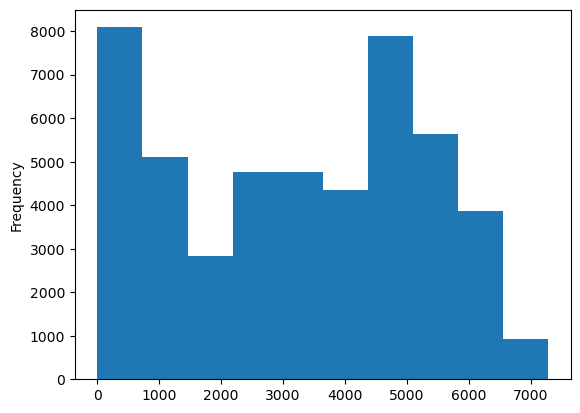

In [2]:
i_94['traffic_volume'].plot.hist()

In [3]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

# Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours)
Nighttime data: hours from 7 PM to 7 AM (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [4]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >=7) & (i_94['date_time'].dt.hour < 19)] 
night = i_94.copy()[(i_94['date_time'].dt.hour >=19) | (i_94['date_time'].dt.hour < 7)] 

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


Now that we've isolated `day` and `night`, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

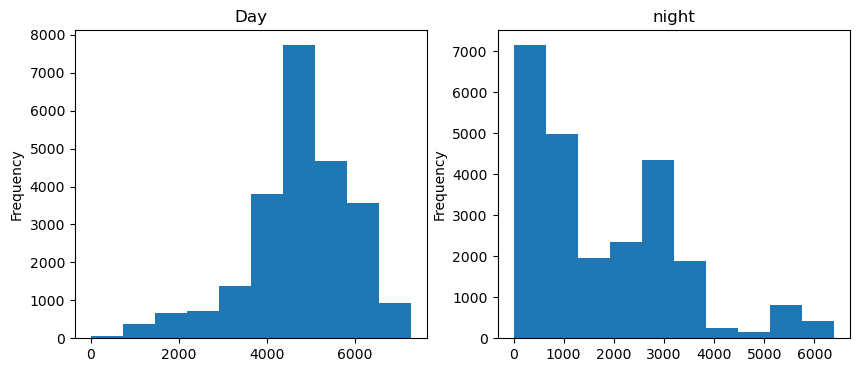

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Day')

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('night')

plt.show()

In [6]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

# Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

1. Month
2. Day of the week
3. Time of day

In [8]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\2089308581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


month
1     4622.689084
2     4736.694573
3     4881.234756
4     4716.691830
5     4772.578972
6     4870.382338
7     4779.864315
8     4931.924710
9     4935.612362
10    4851.554223
11    4633.293880
12    4430.714217
Name: traffic_volume, dtype: float64

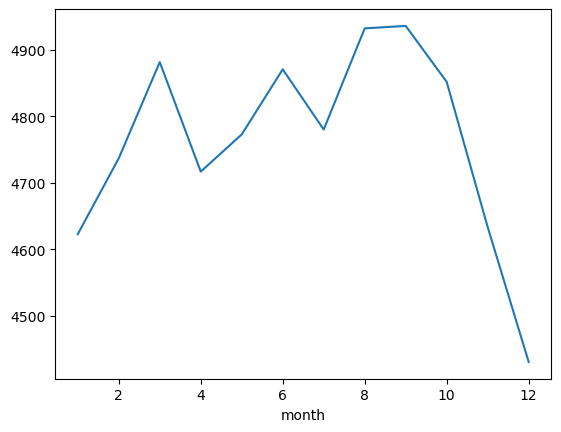

In [9]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July

**Let's now look at a more granular indicator: day number.**



In [10]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\1778748283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean()


dayofweek
0    4887.553587
1    5035.351814
2    5126.538551
3    5100.114614
4    5066.925969
5    4187.281591
6    3926.041581
Name: traffic_volume, dtype: float64

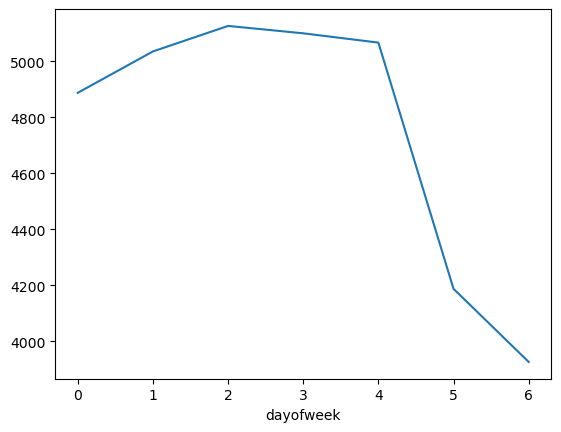

In [11]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

**Let's now see what values we have based on time of the day.** The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

In [12]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     5588.429059
8     5179.584970
9     4712.267498
10    4321.843309
11    4586.355556
12    4815.617416
13    4818.836283
14    5082.349432
15    5466.781295
16    5998.102528
17    5599.080493
18    4382.161693
Name: traffic_volume, dtype: float64
hour
7     2711.582382
8     3137.225539
9     3564.674783
10    3839.516074
11    4164.141831
12    4472.171480
13    4458.324226
14    4554.262032
15    4662.404412
16    4819.592199
17    4590.694946
18    3950.550459
Name: traffic_volume, dtype: float64


C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\2522366303.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\2522366303.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


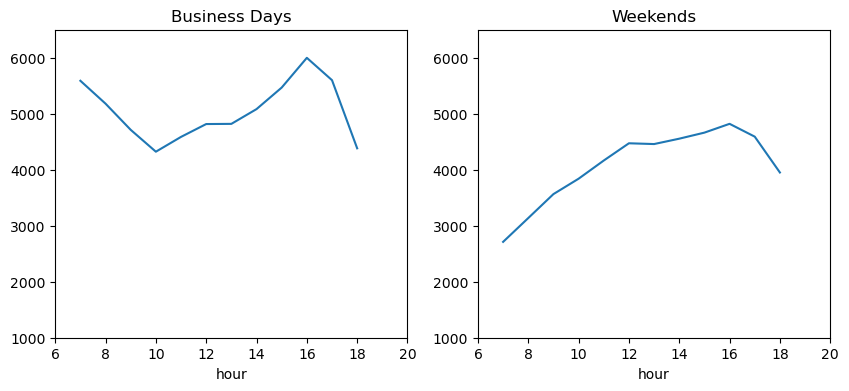

In [13]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title("Business Days")
plt.xlim(6,20)
plt.ylim(1000,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title("Weekends")
plt.xlim(6,20)
plt.ylim(1000,6500)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

# Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [14]:
day.corr()['traffic_volume']

C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\3421110943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.021203
dayofweek        -0.281979
hour              0.172704
Name: traffic_volume, dtype: float64

`Temperature` shows the strongest correlation with a value of just +0.13. The other relevant columns don't show any strong correlation with `traffic_value`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

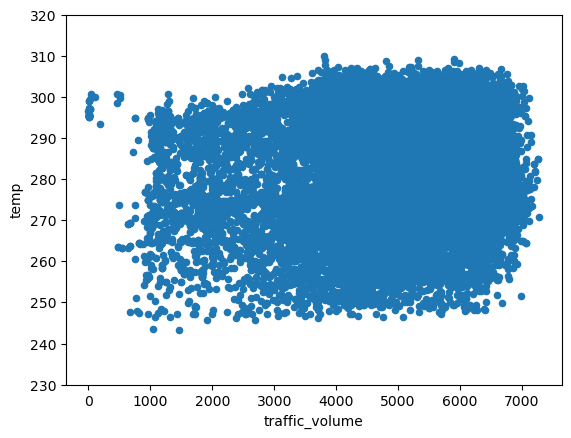

In [15]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

# Weather Types

To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.

C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\3783672548.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()


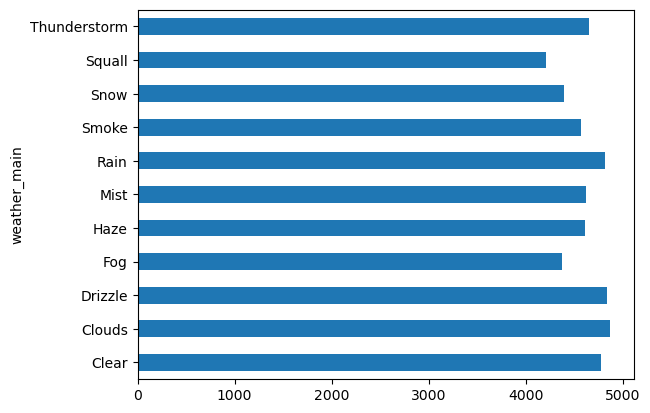

In [16]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()


It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

C:\Users\Linus\AppData\Local\Temp\ipykernel_6560\1932280036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


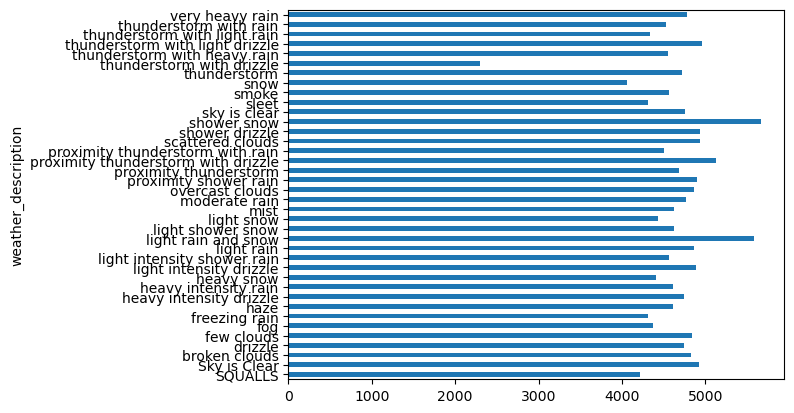

In [17]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh()
plt.show()


It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

1. Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

2. Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle